In [ ]:
# Homework 2

## Abstract

This solution reviews publicly [available salary information](https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w) of employees as published by the [City of Chicago's Data Portal](https://data.cityofchicago.org/).



## Getting Data

This solution uses [Requests](https://requests.readthedocs.io/en/master/user/quickstart/#json-response-content) to make HTTP API requests.

Data is fetched from the City of Chicago's open data portal - https://data.cityofchicago.org/resource/xzkq-xp2w.json?$limit=50000

The url above includes a querystring parameter `$limit` to ensure the full data set of ~33,000 records is retrieved.  

In [15]:
## create conda environment
import sys
!conda create --yes --prefix {sys.prefix}


CondaValueError: The target prefix is the base prefix. Aborting.



In [16]:
## install requests package
import sys
!conda install -c conda-forge --yes --prefix {sys.prefix} requests

Solving environment: done

# All requested packages already installed.



In [94]:
## import requests
import requests

## pandas
import pandas as pd

## fetch data
r = requests.get('https://data.cityofchicago.org/resource/xzkq-xp2w.json?$limit=50000')

## check HTTP response code
print('HTTP Status Code: ' + str(r.status_code))

## the HTTP response contains a few headers that provide additional context
print(r.headers['Last-Modified'])
print(r.headers['X-SODA2-Fields'])
print(r.headers['X-SODA2-Types'])

## build DataFrame from JSON response
df = pd.DataFrame.from_dict(r.json())

## review data structure
df.head()

HTTP Status Code: 200
Wed, 29 Jul 2020 21:14:14 GMT
["name","job_titles","department","full_or_part_time","salary_or_hourly","typical_hours","annual_salary","hourly_rate"]
["text","text","text","text","text","number","number","number"]


,name,job_titles,department,full_or_part_time,salary_or_hourly,annual_salary,typical_hours,hourly_rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,111444,NaN,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,94122,NaN,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,DAIS,F,Salary,118608,NaN,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,117072,NaN,NaN
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,NaN,40,44.4


In [ ]:
## Data Analysis

In [33]:
## defualt NaN to 0
df.fillna(0)

## view datatypes
print(df.dtypes)

## cast salary, hours and rate to numeric
df['annual_salary'] = pd.to_numeric(df['annual_salary'],errors='coerce')
df['typical_hours'] = pd.to_numeric(df['typical_hours'],errors='coerce')
df['hourly_rate'] = pd.to_numeric(df['hourly_rate'],errors='coerce')

## view updated datatypes
print(df.dtypes)

name                  object
job_titles            object
department            object
full_or_part_time     object
salary_or_hourly      object
annual_salary         object
typical_hours        float64
hourly_rate           object
dtype: object
name                  object
job_titles            object
department            object
full_or_part_time     object
salary_or_hourly      object
annual_salary        float64
typical_hours        float64
hourly_rate          float64
dtype: object


Min: 20400.0
Mean: 89609.2195137762
Median: 90024.0
Max: 275004.0


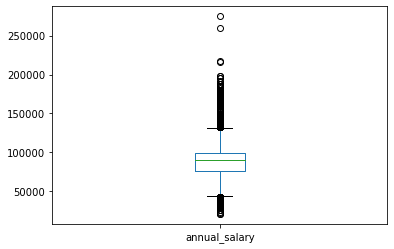

In [65]:
## create a DataFrame of salary employees
salaried_employees = df[df['salary_or_hourly'] == 'Salary']

salaried_employees.head()

Min: 20400.0
Mean: 89609.2195137762
Median: 90024.0
Max: 275004.0


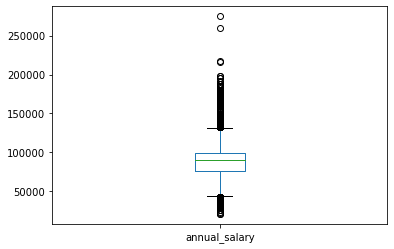

In [67]:
print('Min: ' + str(salaried_employees['annual_salary'].min()))
print('Mean: ' + str(salaried_employees['annual_salary'].mean()))
print('Median: ' + str(salaried_employees['annual_salary'].median()))
print('Max: ' + str(salaried_employees['annual_salary'].max()))

salaried_employees['annual_salary'].plot(kind = 'box')

In [80]:
# determine highest paid employee
max_employee = salaried_employees[salaried_employees['annual_salary'] == salaried_employees['annual_salary'].max()]

print(max_employee['name'] + ' ' + str(max_employee['annual_salary']))
print(max_employee['job_titles'] + ' - ' + max_employee['department'])

24428    RHEE,  JAMIE L 24428    275004.0\nName: annual...
Name: name, dtype: object
24428    COMMISSIONER OF AVIATION - AVIATION
dtype: object


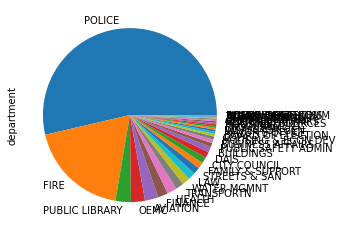

In [86]:
# plot pie of departments
salaried_employees['department'].value_counts().plot(kind = 'pie')

In [87]:
## create a DataFrame of salary employees
hourly_employees = df[df['salary_or_hourly'] == 'Hourly']

hourly_employees.head()

,name,job_titles,department,full_or_part_time,salary_or_hourly,annual_salary,typical_hours,hourly_rate
4,"ABARCA, EMMANUEL",CONCRETE LABORER,TRANSPORTN,F,Hourly,NaN,40.0,44.40
6,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,NaN,20.0,19.86
7,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,NaN,40.0,50.00
10,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,NaN,20.0,3.00
21,"ABDULLAH, RASHAD",ELECTRICAL MECHANIC (AUTOMOTIVE),DAIS,F,Hourly,NaN,40.0,50.00


In [88]:
print('Min: ' + str(hourly_employees['hourly_rate'].min()))
print('Mean: ' + str(hourly_employees['hourly_rate'].mean()))
print('Median: ' + str(hourly_employees['hourly_rate'].median()))
print('Max: ' + str(hourly_employees['hourly_rate'].max()))

Min: 3.0
Mean: 35.192483291835586
Median: 38.35
Max: 128.0


In [89]:
max_hourly = hourly_employees[hourly_employees['hourly_rate'] == hourly_employees['hourly_rate'].max()]

print(max_hourly)

                 name    job_titles department full_or_part_time  \
14384  JONES,  JOHN W  PSYCHIATRIST     HEALTH                 F   

      salary_or_hourly  annual_salary  typical_hours  hourly_rate  
14384           Hourly            NaN           35.0        128.0  


In [ ]:
# hourly_employees['department'].value_counts()

# hourly_employees['department'].value_counts().plot(kind = 'hist')

hourly_employees['department'].value_counts().plot(kind = 'pie')